# Ethiopia Sorghum Crop Yield Predictions :earth_africa:



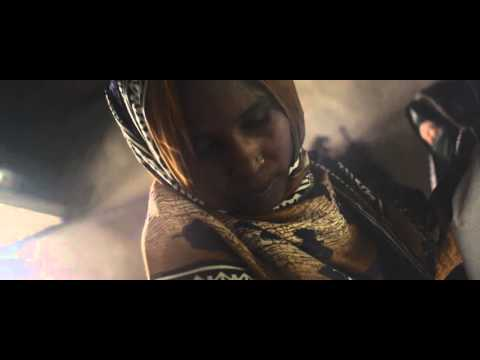

In [1]:
from IPython.display import YouTubeVideo, Image
YouTubeVideo('j7KKZ6v5o34')

## A.  Exectuive Summary

One out of nine people in the world suffers hunger every day.  75% of the people do not have enough to eat are small farmers in the developing countries. There are many factors contribute to farmers’ poverty other than bad weather and soil quality. World hunger issue is a big problem to solve. However, by analyzing and understanding the factors that affect agriculture production is a small step toward solving the hunger issue for the small farmers. 
This report is find the relationship between basic variables that have an impact on Ethiopia sorghum crop production by comparing four different regression models to make crop yield predictions. 

The following regression models were used for the prediction:
    1.	Multi-linear Regression Model
    2.	Support Vector Regression Model
    3.	Random Forest Regression Model
    4.	Gradient Boosting Regression Model
    

The Root Mean Square Error (RMSE) and model cross validation with RMSE of the above four models suggest that RandomForest Regression model is the most accurate model for crop yield prediction. 
Adequate precipitation and right temperature, as expected, are the most vital factors to Sorghum yield production even though the crop can tolerate drought and heat. Fertilizer, especially nitrogen plays an important role to the success crop yield production. 
In the matter of fact, Ethiopia sorghum yields exceeded both regional and world average with increase fertilizer application, fertilizer manufacturing plants investment, and water storage system since year 2002. For a country that had suffered 2 server famines in the past 30 years, it is a little success story. 
Food and Agriculture Organization of The United Nations recently has declared food crisis emergency on Ethiopia neighboring countries, Somalia, Yemen and South Sudan. These Eastern African countries continue to suffer famine year after year. There is something we can learn from the Ethiopia success story the to help these countries to fight famine.

## B.	Workflow and methdology

<img scr = 'workflow.png'>


1.	Research about farming, crop yields, and countries were conducted prior to data collection. There are 5 separated datasets downloaded from Food and Agriculture Organization (FAOSTAT.org) and The World Bank Data websites (data.worldbank.org) as csv files.
    1.	21 years of Ethiopia historical Crop Yield Production data
    2.	25 years of annual historical rainfall data by month
    3.	25 years of annual historical temperature data by month
    4.	12 years of fertilization usage data available
    5.	15 years of inconsistent pesticides & herbicides data 
    
2.	Data then being cleaned, explored, and visualized to understand the trend of crop yield productions, the rainfall & temperature pattern, and the fertilizers and pesticide application patterns. 5 datasets then melted and merged for modeling.
3.	Further research is done to determine if all the fertilizers and pesticides chemicals are pertinent to farm usage. Irrelevant features were removed to prevent modeling overfitting. 
4.	 Since the prediction is a regression problem, four regression models were selected to compare which one make the most accurate but can also generalize the prediction.
5.	Finally, conclusion is made on the finding
6.	Additional suggestions are made to apply the model to organizations who may help to make wise investment to the neighboring countries to fight famines.
                     


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


## 1. Data Cleaning and Exploratory Data Analysis

### a. Ethiopia Historical Sorghum Crop Yield Dataset

In [3]:
# Load the historical Ethiopia sorgham crop yield dataset. 

crop_yield = pd.read_csv('../project-capstone/dataset/FAOSTAT_data_6-28-2017 - Ethiopia_Sorghum_Yield.csv')
crop_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,1993,hg/ha,14018,Fc,Calculated data
1,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,1994,hg/ha,9319,Fc,Calculated data
2,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,1995,hg/ha,12401,Fc,Calculated data
3,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1996,1996,hg/ha,13575,Fc,Calculated data
4,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1997,1997,hg/ha,14136,Fc,Calculated data


In [4]:
# Check dimention and datatypes 
crop_yield.info()

# The datatypes look good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 14 columns):
Domain Code         22 non-null object
Domain              22 non-null object
Area Code           22 non-null int64
Area                22 non-null object
Element Code        22 non-null int64
Element             22 non-null object
Item Code           22 non-null int64
Item                22 non-null object
Year Code           22 non-null int64
Year                22 non-null int64
Unit                22 non-null object
Value               22 non-null int64
Flag                22 non-null object
Flag Description    22 non-null object
dtypes: int64(6), object(8)
memory usage: 2.5+ KB


In [5]:
# Check the statistics of crop production value
crop_yield.Value.describe()

count       22.000000
mean     15438.045455
std       4069.629332
min       9319.000000
25%      12697.750000
50%      13853.000000
75%      18102.000000
max      23651.000000
Name: Value, dtype: float64

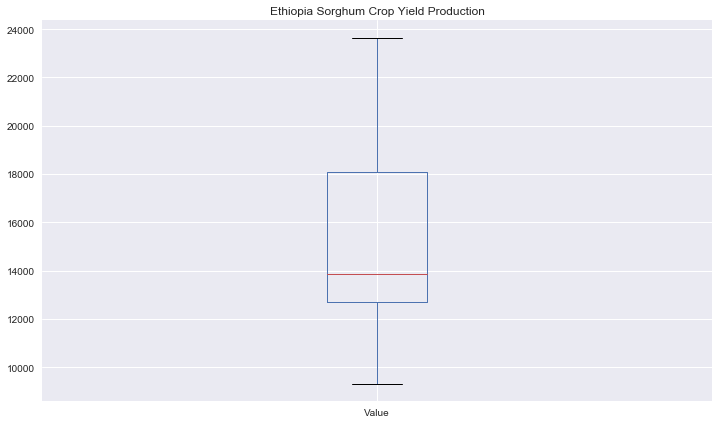

In [6]:
crop_yield.Value.plot(kind = 'box', title = 'Ethiopia Sorghum Crop Yield Production', figsize = (12, 7))

In [7]:
# Set year as index for time-series to look at the Sorghum yield production through the years in Ethiopia
crop_yield.set_index('Year', inplace=True)
crop_yield.head(15)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,hg/ha,14018,Fc,Calculated data
1994,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,hg/ha,9319,Fc,Calculated data
1995,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,hg/ha,12401,Fc,Calculated data
1996,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1996,hg/ha,13575,Fc,Calculated data
1997,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1997,hg/ha,14136,Fc,Calculated data
1998,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1998,hg/ha,11034,Fc,Calculated data
1999,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1999,hg/ha,12478,Fc,Calculated data
2000,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,2000,hg/ha,11750,Fc,Calculated data
2001,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,2001,hg/ha,11394,Fc,Calculated data


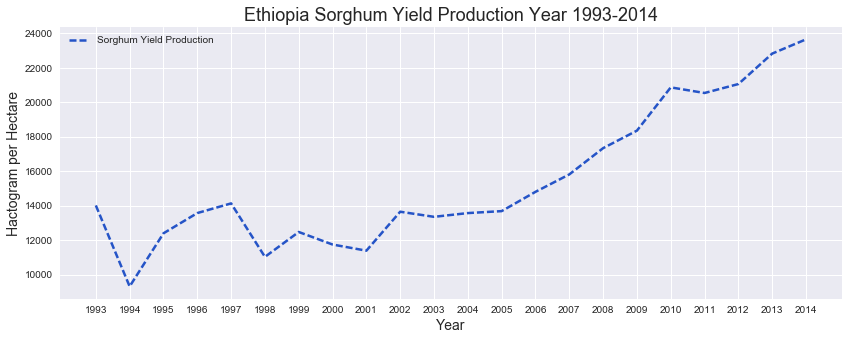

In [8]:
# Plot the yield production through the years

plt.figure(figsize = (14, 5))
plt.plot(crop_yield.Value, lw = 2.5, color = '#2554C7', ls = '--', label = 'Sorghum Yield Production')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Yield Production Year 1993-2014', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Hactogram per Hectare', fontsize = 14)
plt.xticks(np.arange(1993, 2015, 1))
plt.show()


#### The chart shows the sorghum crop yields have improved over the years. See the dip in year of 1994? That's the year Ethiopia overthrown the dictorship Mengistu Regime that contributed low yield production and famine in the past.

https://en.wikipedia.org/wiki/Ethiopian_Constituent_Assembly_election,_1994

### b. Ethiopia Historical Sorghum Value Dataset

In [9]:
# Load & sample the crop value dataset.
crop_value = pd.read_csv('../project-capstone/dataset/FAOSTAT_data_6-28-2017_Ethiopia_Sorghum_Value.csv')
crop_value.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1993,1993,1000 Int. $,96636.43744,*,Unofficial figure
1,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1994,1994,1000 Int. $,108064.53600,*,Unofficial figure
2,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1995,1995,1000 Int. $,175445.76080,*,Unofficial figure


In [10]:
# Check crop value dataset dimenion and datatypes
crop_value.info()

# Dataset look good as well.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
Domain Code         132 non-null object
Domain              132 non-null object
Area Code           132 non-null int64
Area                132 non-null object
Element Code        132 non-null int64
Element             132 non-null object
Item Code           132 non-null int64
Item                132 non-null object
Year Code           132 non-null int64
Year                132 non-null int64
Unit                132 non-null object
Value               132 non-null float64
Flag                132 non-null object
Flag Description    132 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 14.5+ KB


In [11]:
# Check the crop value statistics
crop_value.Value.describe()

count       132.000000
mean     113165.187283
std      184793.105577
min         109.458319
25%         683.026853
50%        2662.686435
75%      202898.659775
max      667376.165700
Name: Value, dtype: float64

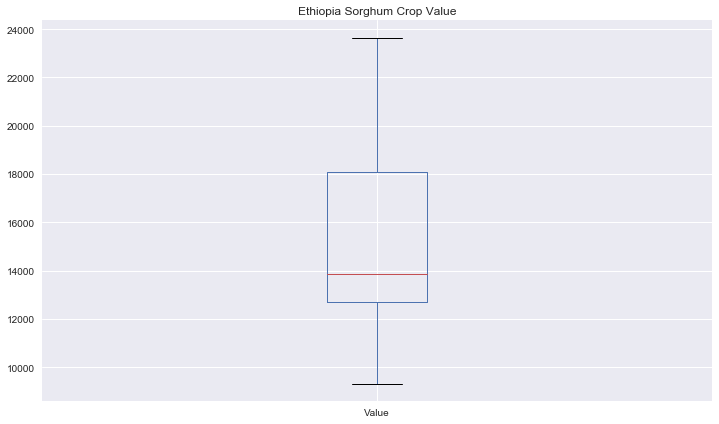

In [12]:
# plot the statistics
crop_yield.Value.plot(kind = 'box', title = 'Ethiopia Sorghum Crop Value', figsize = (12, 7))

# The crop value is very simliar to the production and has the same statistics figures

In [13]:
# Set the year as index for time series to look at the crop value over the years
crop_value.set_index('Year', inplace = True )
crop_value.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1993,1000 Int. $,96636.43744,*,Unofficial figure
1994,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1994,1000 Int. $,108064.53600,*,Unofficial figure
1995,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1995,1000 Int. $,175445.76080,*,Unofficial figure
1996,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1996,1000 Int. $,278031.49080,*,Unofficial figure
1997,QV,Value of Agricultural Production,238,Ethiopia,152,Gross Production Value (constant 2004-2006 100...,83,Sorghum,1997,1000 Int. $,313820.14360,*,Unofficial figure


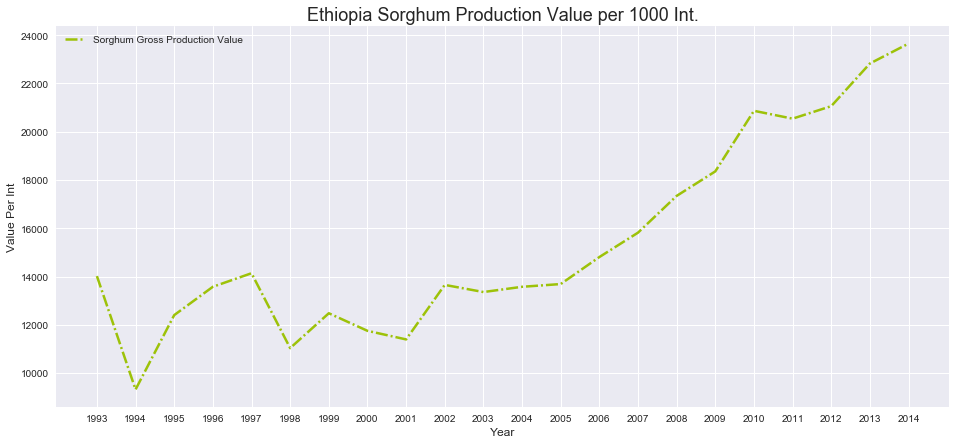

In [14]:
plt.figure(figsize = (16, 7))
plt.plot(crop_yield.Value, lw = 2.5, color = '#9DC209', ls = '-.', label = 'Sorghum Gross Production Value')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Production Value per 1000 Int.', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Value Per Int', fontsize = 12)
plt.xticks(np.arange(1993, 2015, 1))
plt.show()

### The yield production and the crop value datasets look very similar. Only one dataset is needed.  The yield production dataset will be kept.

### c. Ethiopia Historical Precipitation Dataset

In [15]:
rain = pd.read_csv('../project-capstone/dataset/Ethiopia Historical Rain_1991_2015.csv')
rain.head()

,Rainfall (mm),Year,Month,Country
0,13.0865,1991,1,ETH
1,21.1366,1991,2,ETH
2,65.6054,1991,3,ETH
3,75.2780,1991,4,ETH
4,81.0750,1991,5,ETH


In [16]:
# Check the datatypes in the rain dataset 
rain.info()
# It looks good, no null value and the datatypes look good. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Rainfall (mm)    300 non-null float64
	Year            300 non-null int64
 Month           300 non-null int64
 Country         300 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 9.4+ KB


In [17]:
# Change the rainfall column name for easy handling later.

rain.columns = ['rain_in_mm', 'year', 'month', 'country']

In [18]:
# check year and month value
rain.groupby('year')[['rain_in_mm']].sum().describe()
# Some months are definitely very dry, only a little over 1 mm of rainfall. 

,rain_in_mm
count,25.000000
mean,804.768136
std,67.089886
min,662.399200
25%,765.512400
50%,817.136310
75%,847.162500
max,967.529140


In [19]:

# Combine the month and year together for timeseries to look at the rainfall through the years and months

rain['yearmonth'] = rain.apply(lambda x: datetime.strptime('{0} {1}'.format(x['year'], x['month']), '%Y %m'), axis=1)
rain.index = rain['yearmonth']
rain.head()

,rain_in_mm,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,13.0865,1991,1,ETH,1991-01-01
1991-02-01,21.1366,1991,2,ETH,1991-02-01
1991-03-01,65.6054,1991,3,ETH,1991-03-01
1991-04-01,75.2780,1991,4,ETH,1991-04-01
1991-05-01,81.0750,1991,5,ETH,1991-05-01


In [20]:
annual_rainfall= rain.groupby(['year'])[['rain_in_mm']].sum()
annual_rainfall.head()

,rain_in_mm
year,
1991,765.51240
1992,732.29820
1993,791.86912
1994,817.13631
1995,711.57019


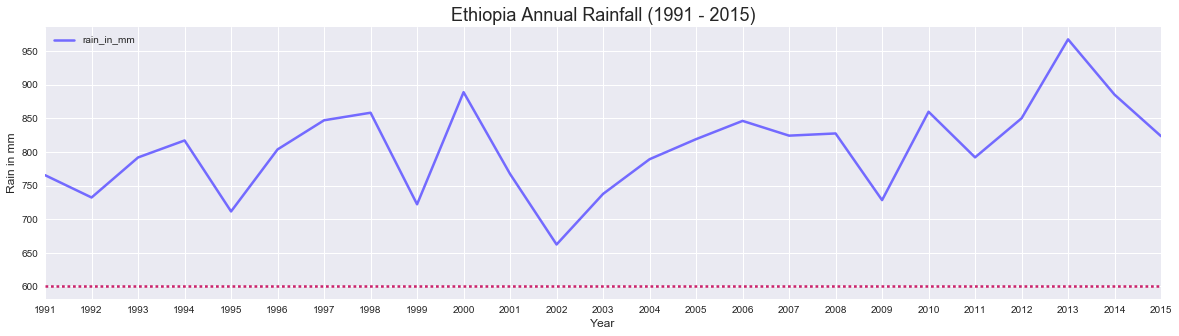

In [21]:
# Plot the annual rainfall pattern.
annual_rainfall.plot(figsize = (20, 5), color = '#736AFF', lw = 2.5)
plt.title ('Ethiopia Annual Rainfall (1991 - 2015)', fontsize = 18)
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Rain in mm', fontsize = 12)
plt.xticks(np.arange(1991, 2016, 1))
ax = plt.gca()
ax.axhline(600, ls = ':', lw = 2.5, color = '#CA226B')

#### The rainfall in Ethiopia varies year to year. However, we can tell winter months is usually very dry. Summer has the most rainfalls.  Some drought years. Year 2002 didn't have much rainfall, barely enough for sorghum crops. Let's look at the total annual rainfall distribution.


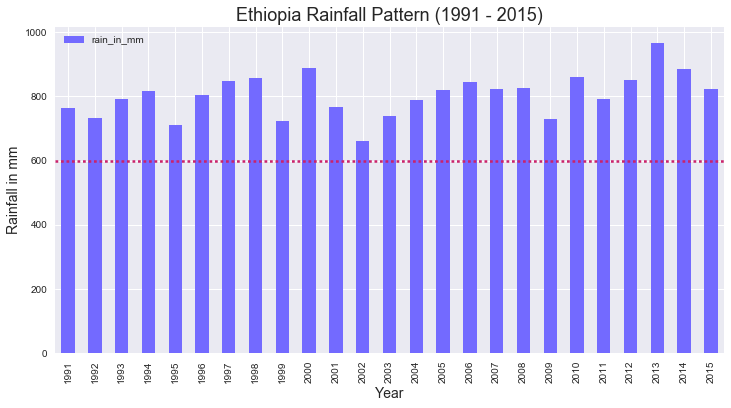

In [22]:
annual_rainfall.plot(kind = 'bar', figsize = (12, 6), grid=True, color = '#736AFF')
ax = plt.gca()
ax.axhline(600, ls = ':', lw = 2.5, color = '#CA226B')
plt.title('Ethiopia Rainfall Pattern (1991 - 2015)', fontsize = 18)
plt.xlabel ('Year', fontsize = 14)
plt.ylabel ('Rainfall in mm', fontsize = 14)

#### #### Sorghum is a very resilient crop requiring only 600mm annual rainfall. Looks like Ethiopia total annual rainfall has more than 600mm (about 23.6 inches). But rainfall fluctuates year by year. Some years barely have sufficient rainfall. Making soghum, compared to other crops, an ideal crop for Ethiopia.

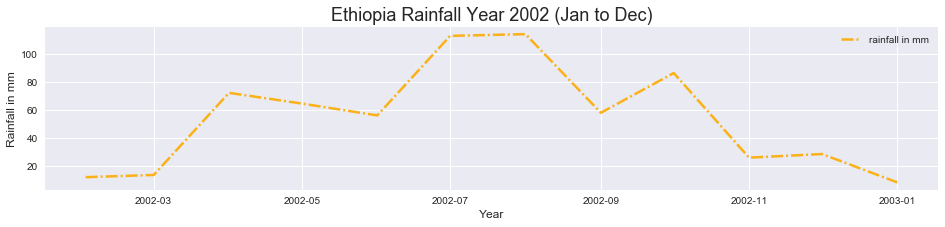

In [23]:
# Look at a few drought years 2002 & 2009
plt.figure(figsize = (16, 3))
plt.plot(rain.rain_in_mm[133:145], lw = 2.5, color = '#FBB117', ls = '-.', label = 'rainfall in mm')
plt.legend(loc ='best')
plt.title('Ethiopia Rainfall Year 2002 (Jan to Dec)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rainfall in mm', fontsize = 12)
plt.show()

# look, some months rainfall are below 20 mm, approximately 1/2 inches of rainfall. 

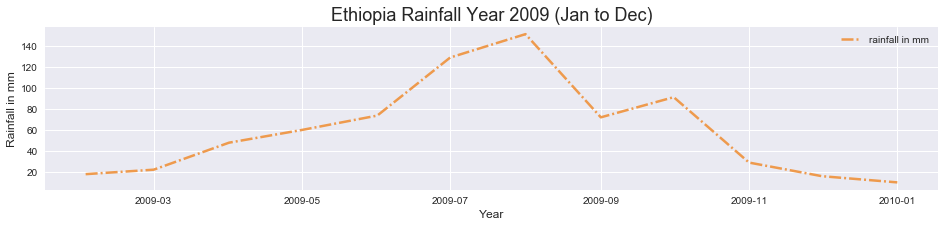

In [24]:

plt.figure(figsize = (16, 3))
plt.plot(rain.rain_in_mm[217:229], lw = 2.5, color = '#EE9A4D', ls = '-.', label = 'rainfall in mm')
plt.legend(loc ='best')
plt.title('Ethiopia Rainfall Year 2009 (Jan to Dec)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rainfall in mm', fontsize = 12)
plt.show()

# Same for year 2009. 

In [25]:

# Let's look at the average monthly rainfall
avg_monthly_rainfall= rain.groupby(['month'])[['rain_in_mm']].mean()
avg_monthly_rainfall.head()


,rain_in_mm
month,
1,12.390554
2,12.524726
3,38.283636
4,78.200684
5,97.749196


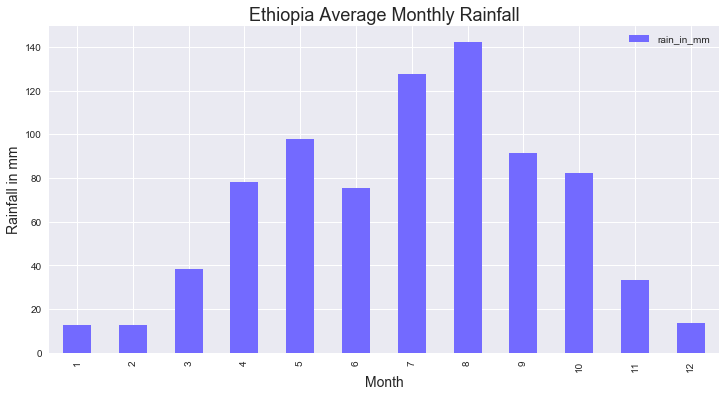

In [26]:
avg_monthly_rainfall.plot(kind = 'bar', figsize = (12, 6), grid=True, color = '#736AFF')
plt.title('Ethiopia Average Monthly Rainfall', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Rainfall in mm', fontsize = 14)

#### The above chart shows the average monthly rainfall. July and August are the rain season in Ethiopia. Winter is extremely dry. 

### d. Ethiopia Histrorical Temperature Dataset

In [27]:
# Load the temperature dataset.
temperature = pd.read_csv('../project-capstone/dataset/Ethiopia Historical Temp_1991_2015.csv')
temperature.head()

,Temperature (C),Year,Month,Country
0,21.8524,1991,1,ETH
1,22.3767,1991,2,ETH
2,23.5291,1991,3,ETH
3,24.7054,1991,4,ETH
4,23.9450,1991,5,ETH


In [28]:
# Change the temperature column name for easy handling later.

temperature.columns = ['temperature_in_C', 'year', 'month', 'country']

In [29]:
# Check the temperature dimension and datatypes
temperature.temperature_in_C.describe()

count    300.000000
mean      22.973923
std        1.272685
min       17.099500
25%       22.132500
50%       23.031650
75%       23.912375
max       25.486300
Name: temperature_in_C, dtype: float64

In [30]:
# Calculate the average monthly temperature
avg_monthly_temp = temperature.groupby(['month'])[['temperature_in_C']].mean()
avg_monthly_temp.head()

,temperature_in_C
month,
1,21.496884
2,22.815424
3,23.971008
4,24.713020
5,24.452632


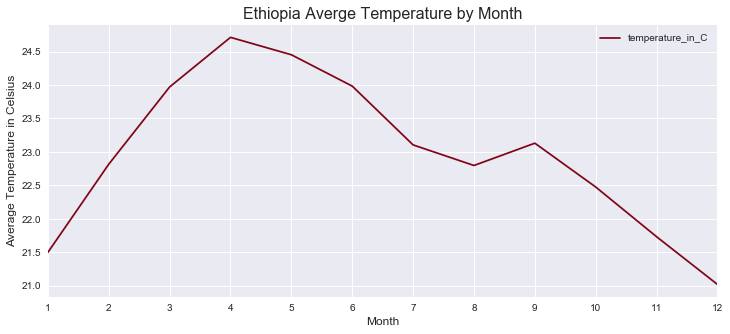

In [31]:
# Plot the average monthy temperature
avg_monthly_temp.plot( figsize = (12, 5), grid=True, color = '#800517', label = 'temperature in Celsius')
plt.title('Ethiopia Averge Temperature by Month', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average Temperature in Celsius', fontsize = 12)
plt.xticks(np.arange(1,13,1))
plt.show()

#### Ethiopia seems to have mild temperature. The hottest months are in April & May. But usually under 27˚C.
####  The ideal temperature for Sorghum crop during growing season between 27˚C - 32˚C. 

In [32]:
# Combine the month and year together for timeseries to look at the rainfall through the years and months

temperature['yearmonth'] = temperature.apply(lambda x: datetime.strptime('{0} {1}'.format(x['year'], x['month']), '%Y %m'), axis=1)
temperature.index = rain['yearmonth']
temperature.head()

,temperature_in_C,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,21.8524,1991,1,ETH,1991-01-01
1991-02-01,22.3767,1991,2,ETH,1991-02-01
1991-03-01,23.5291,1991,3,ETH,1991-03-01
1991-04-01,24.7054,1991,4,ETH,1991-04-01
1991-05-01,23.9450,1991,5,ETH,1991-05-01


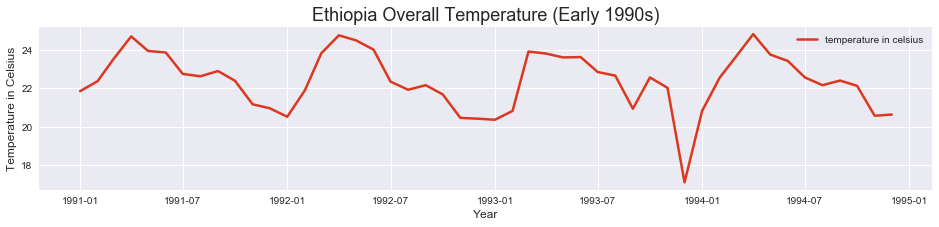

In [33]:
# look at how temperature fluctuated in the early 1990s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[0:48], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (Early 1990s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

#### 1993 winter was cold. The temperature was probably too cold for sorghum growth. May be this is one of the reasons causing the 1994 Ethiopia famine?

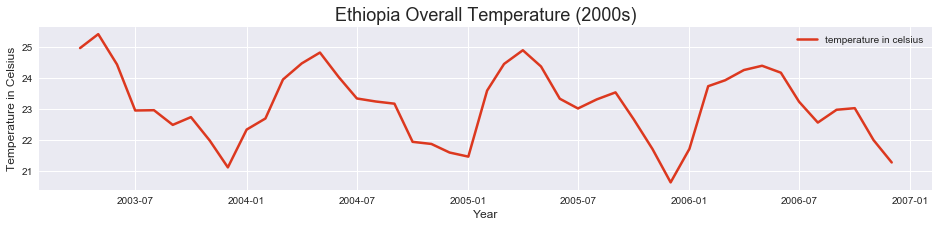

In [34]:
# look at how temperature fluctuated in the early 1990s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[147:192], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (2000s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

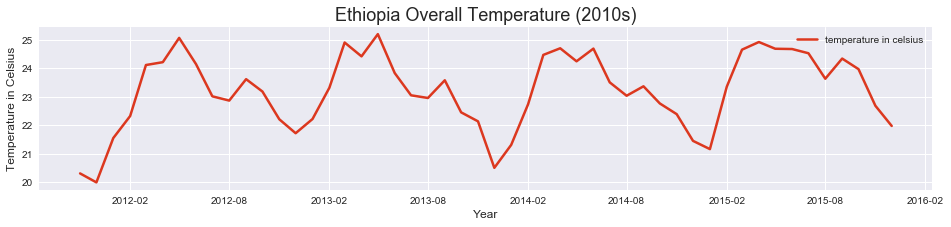

In [35]:
# look at how temperature fluctuated in the early 1990s

plt.figure(figsize = (16, 3))
plt.plot(temperature.temperature_in_C[250:300], lw = 2.5, color = '#DC381F', ls = '-', label = 'temperature in celsius')
plt.legend(loc ='best')
plt.title('Ethiopia Overall Temperature (2010s)', fontsize = 18)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.show()

#### As we can tell by the temperature time series charts, annual temperatures do not fluctuate that much, only a few ˚C. But 1993 winter was an outliner. 

### e. Ethiopia Fertilizer Application Dataset.


In [36]:

fertilizer = pd.read_csv('../project-capstone/dataset/FAOSTAT_data_6-28-2017 - Ethiopia_Fertilizer.csv')
fertilizer.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,0,NR,Not reported by country
1,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,0,NR,Not reported by country
2,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,0,NR,Not reported by country
3,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,0,NR,Not reported by country
4,RF,Fertilizers,238,Ethiopia,5515,Production Quantity in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,0,NR,Not reported by country


In [37]:
# What types of elements are in the fertilizer dataset?
fertilizer.Element.unique()

array(['Production Quantity in nutrients', 'Import Quantity in nutrients',
       'Export Quantity in nutrients', 'Non-fertilizer use in nutrients',
       'Consumption in nutrients', 'Import Quantity', 'Non-fertilizer use',
       'Production', 'Export Quantity', 'Consumption'], dtype=object)

In [38]:
# What are Flag Description?
fertilizer['Flag Description'].unique()

# Looks like these are the source indicators of fertilizer usage.

array(['Not reported by country',
       'Official data from questionnaires and/or national sources and/or COMTRADE (reporters)',
       'Data obtained as a balance', 'Not available'], dtype=object)

In [39]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 14 columns):
Domain Code         1549 non-null object
Domain              1549 non-null object
Area Code           1549 non-null int64
Area                1549 non-null object
Element Code        1549 non-null int64
Element             1549 non-null object
Item Code           1549 non-null int64
Item                1549 non-null object
Year Code           1549 non-null int64
Year                1549 non-null int64
Unit                1549 non-null object
Value               1549 non-null int64
Flag                1549 non-null object
Flag Description    1549 non-null object
dtypes: int64(6), object(8)
memory usage: 169.5+ KB


In [40]:
fertilizer.Value.describe()

count      1549.000000
mean      11085.000000
std       48402.683182
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      560980.000000
Name: Value, dtype: float64

In [41]:
# Dataset has no null value, but there are many 0 values
fertilizer.Value.isnull().sum()

0

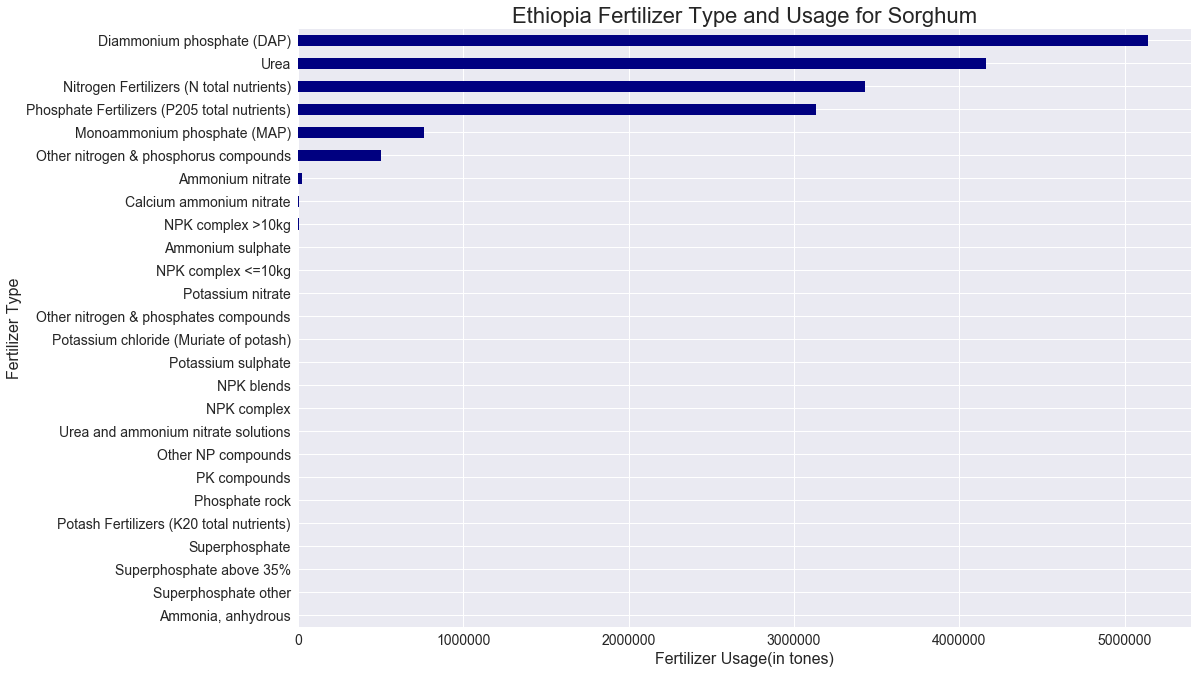

In [42]:

fertilizer.groupby('Item')['Value'].sum().sort_values(ascending = True)[:30].plot(kind = 'barh',
                                                                                 figsize = (16, 11),
                                                                                 color = '#000080',
                                                                                 fontsize = 14)
plt.title('Ethiopia Fertilizer Type and Usage for Sorghum', fontsize = 22)
plt.xlabel('Fertilizer Usage(in tones)', fontsize = 16)
plt.ylabel('Fertilizer Type', fontsize= 16)

# This shows there are many fertilizer information that not available.

#### From the Flag Description column, we have noticed that those states 'not available' have zero value .
#### The zero value does not mean there is no fertilizer applied.  It only means the data is not available.

#### Further research from the fertilization dataset and the FAO Statistics explanation, there are three main plant  nutrients under the consumption nutrient flag description
* 1) Nitrogen Fertilizer (N)
* 2) Phosphate Fertilizer (P2O5)
* 3) Potash Fertilizer (K2O)

#### Because of these, I subsetted the fertilizer dataset contains only the consumption & the 3 main plant nutrients fertilizers. 

In [43]:
fertilizer[fertilizer.Element == 'Consumption in nutrients']

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
52,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
53,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
54,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
55,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
56,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...
57,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2007,2007,tonnes of nutrients,106019,Qm,Official data from questionnaires and/or natio...
58,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2008,2008,tonnes of nutrients,111773,Qm,Official data from questionnaires and/or natio...
59,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2009,2009,tonnes of nutrients,118364,Qm,Official data from questionnaires and/or natio...
60,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2010,2010,tonnes of nutrients,156141,Qm,Official data from questionnaires and/or natio...
61,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2011,2011,tonnes of nutrients,155201,Qm,Official data from questionnaires and/or natio...


#### The Potash Fertilizers all have zero values. According to the FAO Fertilizer handbook, I may be able to imputate the Potash Fertilizer agriculture consumption based on the Postassic production. 
http://fenixservices.fao.org/faostat/static/documents/RF/RF_e.pdf

#### Check the Item on the dataset to find out the potassium related items

In [44]:
fertilizer.Item.unique()

array(['Nitrogen Fertilizers (N total nutrients)',
       'Phosphate Fertilizers (P205 total nutrients)',
       'Potash Fertilizers (K20 total nutrients)', 'Ammonia, anhydrous',
       'Ammonium nitrate', 'Ammonium sulphate', 'Calcium ammonium nitrate',
       'Diammonium phosphate (DAP)', 'Monoammonium phosphate (MAP)',
       'NPK blends', 'NPK complex', 'NPK complex <=10kg',
       'NPK complex >10kg', 'Other nitrogen & phosphates compounds',
       'Other nitrogen & phosphorus compounds', 'Other NP compounds',
       'Phosphate rock', 'PK compounds',
       'Potassium chloride (Muriate of potash)', 'Potassium nitrate',
       'Potassium sulphate', 'Superphosphate', 'Superphosphate above 35%',
       'Superphosphate other', 'Urea',
       'Urea and ammonium nitrate solutions'], dtype=object)

In [45]:

fertilizer[fertilizer.Item.isin(['Potassium chloride (Muriate of potash)', 'Potassium sulphate', 'Potassium nitrate'])].groupby('Item')[['Value']].sum()

# No luck, there is not much information either. I assume there is not significant amount of
# potash fertilizer being used in Ethiopia. We will just use the Nitrogen and Phospate variables. 

,Value
Item,
Potassium chloride (Muriate of potash),18
Potassium nitrate,44
Potassium sulphate,2


In [46]:
plant_fertilizer = fertilizer[(fertilizer.Element == 'Consumption in nutrients') & (fertilizer.Item !='Potash Fertilizers (K20 total nutrients)')]
plant_fertilizer.Item.unique()
plant_fertilizer.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
52,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
53,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
54,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
55,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
56,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...


In [47]:
# Save this to a .csv file

plant_fertilizer.to_csv('plant_fertilizer.csv', index = False)

In [48]:
fert_usage = pd.read_csv('plant_fertilizer.csv')
fert_usage.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2002,2002,tonnes of nutrients,97647,Fb,Data obtained as a balance
1,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2003,2003,tonnes of nutrients,34075,Fb,Data obtained as a balance
2,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2004,2004,tonnes of nutrients,81860,Qm,Official data from questionnaires and/or natio...
3,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2005,2005,tonnes of nutrients,80503,Qm,Official data from questionnaires and/or natio...
4,RF,Fertilizers,238,Ethiopia,5155,Consumption in nutrients,3102,Nitrogen Fertilizers (N total nutrients),2006,2006,tonnes of nutrients,84628,Qm,Official data from questionnaires and/or natio...


In [49]:
# Most of the information on the fertilizer dataset for explanation only. We can simplify the datset by removing
# these columns

fert_usage.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element', 'Element Code', 'Item Code', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis = 1, inplace = True)



In [50]:
# rename columns & set year in index

fert_usage.columns = ['item', 'year', 'fertilizer_value']
fert_usage.index = fert_usage['year']
fert_usage.head()

,item,year,fertilizer_value
year,,,
2002,Nitrogen Fertilizers (N total nutrients),2002,97647
2003,Nitrogen Fertilizers (N total nutrients),2003,34075
2004,Nitrogen Fertilizers (N total nutrients),2004,81860
2005,Nitrogen Fertilizers (N total nutrients),2005,80503
2006,Nitrogen Fertilizers (N total nutrients),2006,84628


In [51]:
fert_usage.item.unique()

array(['Nitrogen Fertilizers (N total nutrients)',
       'Phosphate Fertilizers (P205 total nutrients)'], dtype=object)

In [52]:
# simplify item names

fert_usage['item'] = fert_usage.item.map(lambda x: 'nitrogen' if x == 'Nitrogen Fertilizers (N total nutrients)'
                                        else 'phosphate')
fert_usage.head(3)


,item,year,fertilizer_value
year,,,
2002,nitrogen,2002,97647
2003,nitrogen,2003,34075
2004,nitrogen,2004,81860


In [53]:
# Save file for further use
fert_usage.to_csv('fert_usage.csv', index = False)

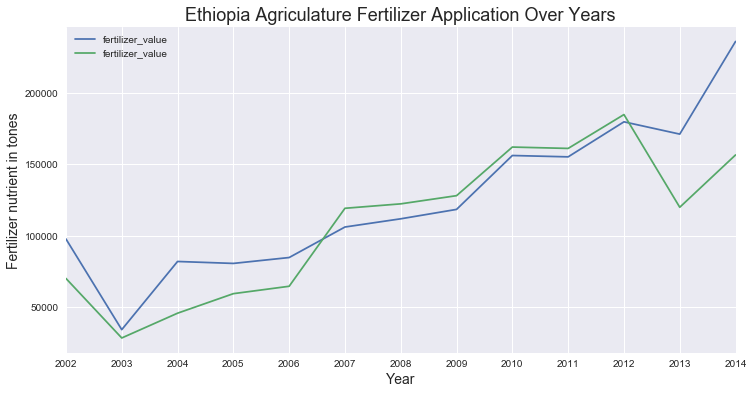

In [54]:
# Check the Nitgrogen and Phosphate fertilizer application over the years

fert_usage[fert_usage.item=='nitrogen'].fertilizer_value.plot(figsize = (12,6),  legend= 'Nitrogen')
fert_usage[fert_usage.item=='phosphate'].fertilizer_value.plot(legend = 'Phosphate')
plt.title('Ethiopia Agriculature Fertilizer Application Over Years', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Fertilizer nutrient in tones', fontsize = 14)
plt.xticks(np.arange(2002, 2015, 1))
plt.show()

#### Fertilizer application for both Nitrogen and Phosphate also increased  over the years. 

### f. Ethiopia Historical Pesticide Dataset

In [55]:
pesticide = pd.read_csv('../project-capstone/dataset/FAOSTAT_data_7-7-2017-Ethiopia_Pesticide.csv')
pesticide.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1995,1995,tonnes of active ingredients,242.0,A,"Aggregate, may include official, semi-official..."
1,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1996,1996,tonnes of active ingredients,383.0,A,"Aggregate, may include official, semi-official..."
2,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,1998,1998,tonnes of active ingredients,383.0,A,"Aggregate, may include official, semi-official..."
3,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,2000,2000,tonnes of active ingredients,602.0,A,"Aggregate, may include official, semi-official..."
4,RP,Pesticides Use,238,Ethiopia,5161,Use,1357,Pesticides,2001,2001,tonnes of active ingredients,630.0,A,"Aggregate, may include official, semi-official..."


In [56]:
# Check how many unique element, item, and flag description in the pesticide dataset
print pesticide.Element.unique()
print pesticide.Item.unique()
print pesticide['Flag Description'].unique()

['Use']
['Pesticides' 'Insecticides' 'Chlorinated Hydrocarbons' 'Organo-Phosphates'
 'Carbamates Insecticides' 'Pyrethroids' 'Other Insecticides' 'Herbicides'
 'Phenoxy Hormone Products' 'Triazines' 'Amides' 'Dinitroanilines'
 'Urea derivates' 'Sulfonyl Ureas' 'Bipiridils' 'Other Herbicides'
 'Fungicides&Bactericides' 'Inorganics' 'Dithiocarbamates' 'Benzimidazoles'
 'Triazoles, Diazoles' 'Diazines, Morpholines' 'Other Fungicides'
 'Seed Treatm Fungicides' 'Plant Growth Regulators' 'Rodenticides'
 'Anticoagulants' 'Other Rodenticides']
[ 'Aggregate, may include official, semi-official, estimated or calculated data'
 'Official data reported on FAO Questionnaires from countries'
 'Data reported on country official publications or web sites (Official) or trade country files']


#### In addition to pesticide, the pesticide dataset contains herbicides. This is especially important because Striga infestation is very serious in Ethiopia. Striga is a purple flower weeds that sucks nutrient from major crops and very hard to control.

In [57]:
pesticide.groupby('Item')[['Value']].describe()

Value                                           \
                         count         mean          std    min     25%   
Item                                                                      
Amides                     3.0     9.666667     5.033223    5.0    7.00   
Anticoagulants             2.0     0.500000     0.707107    0.0    0.25   
Benzimidazoles             2.0     2.000000     2.828427    0.0    1.00   
Bipiridils                 1.0     0.000000          NaN    0.0    0.00   
Carbamates Insecticides    4.0    22.500000    26.987651    1.0    1.75   
Chlorinated Hydrocarbons   5.0    27.800000    21.147104    7.0   13.00   
Diazines, Morpholines      1.0     1.000000          NaN    1.0    1.00   
Dinitroanilines            3.0     4.000000     1.000000    3.0    3.50   
Dithiocarbamates           4.0    10.500000     5.000000    3.0   10.50   
Fungicides&Bactericides   11.0   133.627273   112.813289    4.0   25.50   
Herbicides                11.0  1275.390909  1111.347516  100.0  325.50   
Inorganics                 2.0    10.000000     4.242641    7.0    8.50   
Insecticides              11.0   305.572727   249.378945   38.0  108.50   
Organo-Phosphates          5.0    32.800000    27.598913    2.0   20.00   
Other Fungicides           5.0    28.200000    63.057117    0.0    0.00   
Other Herbicides           5.0    18.400000     9.838699    2.0   18.00   
Other Insecticides         3.0    41.333333    45.081408    3.0   16.50   
Other Rodenticides         1.0     7.000000          NaN    7.0    7.00   
Pesticides                11.0  1721.418182  1409.343173  242.0  492.50   
Phenoxy Hormone Products   5.0   241.800000   193.202484   34.0  108.00   
Plant Growth Regulators   10.0     0.800000     0.498888    0.0    0.60   
Pyrethroids                5.0    11.200000     6.978539    2.0    7.00   
Rodenticides               6.0     6.333333     6.121002    0.0    2.00   
Seed Treatm Fungicides     3.0    11.033333     8.412689    2.9    6.70   
Sulfonyl Ureas             1.0     1.000000          NaN    1.0    1.00   
Triazines                  5.0    20.400000    15.404545    3.0    5.00   
Triazoles, Diazoles        3.0     1.000000     1.000000    0.0    0.50   
Urea derivates             1.0     1.000000          NaN    1.0    1.00   

                                                   
                             50%      75%     max  
Item                                               
Amides                       9.0    12.00    15.0  
Anticoagulants               0.5     0.75     1.0  
Benzimidazoles               2.0     3.00     4.0  
Bipiridils                   0.0     0.00     0.0  
Carbamates Insecticides     15.5    36.25    58.0  
Chlorinated Hydrocarbons    25.0    33.00    61.0  
Diazines, Morpholines        1.0     1.00     1.0  
Dinitroanilines              4.0     4.50     5.0  
Dithiocarbamates            13.0    13.00    13.0  
Fungicides&Bactericides    143.8   184.45   377.1  
Herbicides                1197.6  1767.40  3109.7  
Inorganics                  10.0    11.50    13.0  
Insecticides               165.0   533.35   666.4  
Organo-Phosphates           22.0    47.00    73.0  
Other Fungicides             0.0     0.00   141.0  
Other Herbicides            22.0    22.00    28.0  
Other Insecticides          30.0    60.50    91.0  
Other Rodenticides           7.0     7.00     7.0  
Pesticides                1400.7  2598.50  4128.1  
Phenoxy Hormone Products   183.0   394.00   490.0  
Plant Growth Regulators      1.0     1.00     1.4  
Pyrethroids                 12.0    15.00    20.0  
Rodenticides                 6.0     7.75    17.0  
Seed Treatm Fungicides      10.5    15.10    19.7  
Sulfonyl Ureas               1.0     1.00     1.0  
Triazines                   26.0    32.00    36.0  
Triazoles, Diazoles          1.0     1.50     2.0  
Urea derivates               1.0     1.00     1.0

In [58]:
# Make a copy of the original dataset to work on 
pesticide_usage = pesticide.copy()

In [59]:
# Simplify the pesticide dataset

pesticide_usage.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element','Element Code', 'Item Code', 'Year Code','Unit', 'Flag','Flag Description'], axis = 1, inplace = True)
pesticide_usage.head()

,Item,Year,Value
0,Pesticides,1995,242.0
1,Pesticides,1996,383.0
2,Pesticides,1998,383.0
3,Pesticides,2000,602.0
4,Pesticides,2001,630.0


In [60]:
pesticide_usage.columns = ['item', 'year', 'pesticide_value']
pesticide_usage.index = pesticide_usage['year']
pesticide_usage.head()

,item,year,pesticide_value
year,,,
1995,Pesticides,1995,242.0
1996,Pesticides,1996,383.0
1998,Pesticides,1998,383.0
2000,Pesticides,2000,602.0
2001,Pesticides,2001,630.0


In [61]:
# Save the simplifed pesticide datatset 
pesticide_usage.to_csv('pesticide_usage.csv', index = False)

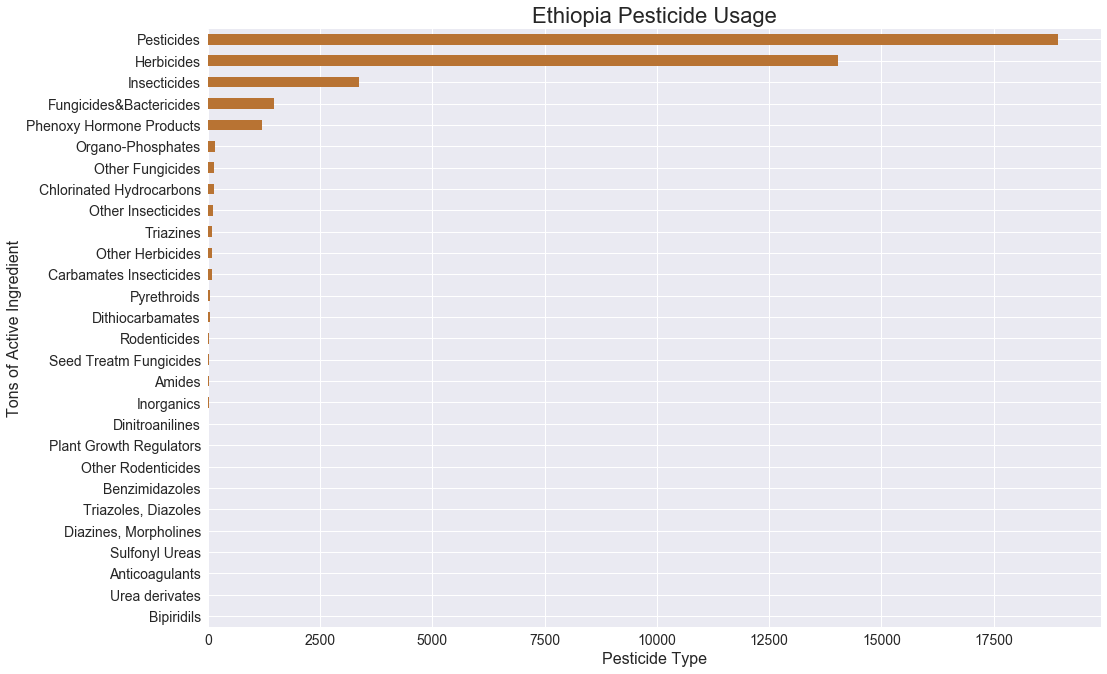

In [62]:
pesticide_usage.groupby('item')['pesticide_value'].sum().sort_values(ascending =True).plot(kind = 'barh', 
                                                                                   figsize = (16, 11), 
                                                                                   color = '#B87333', 
                                                                                 fontsize = 14)
                                                                                  
plt.title('Ethiopia Pesticide Usage', fontsize = 22)
plt.xlabel('Pesticide Type', fontsize = 16)
plt.ylabel('Tons of Active Ingredient', fontsize = 16)



#### Ethiopia applies Pesticides, Herbicides, Insecticides, Fungicides&Bactericides, and Phenoxy Hormone Products the most. 

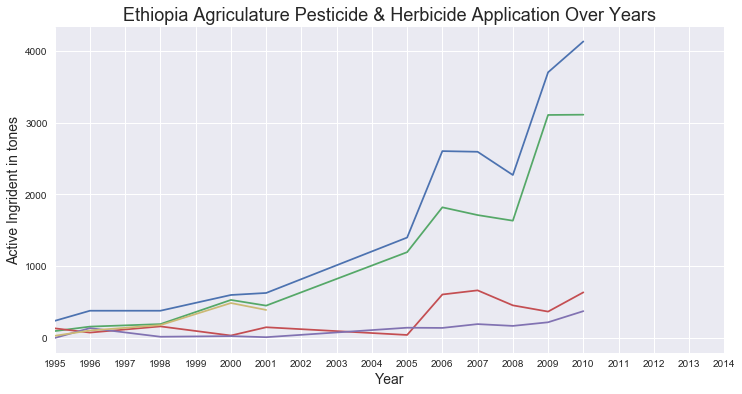

In [63]:
# Look at the 4 major pesticides and herbicides

pesticide_usage[pesticide_usage.item=='Pesticides'].pesticide_value.plot(figsize = (12,6), label = 'Pesticides')
pesticide_usage[pesticide_usage.item=='Herbicides'].pesticide_value.plot(figsize = (12,6), label = 'Herbicides')
pesticide_usage[pesticide_usage.item=='Insecticides'].pesticide_value.plot(figsize = (12,6), label = 'Insecticides')
pesticide_usage[pesticide_usage.item=='Fungicides&Bactericides'].pesticide_value.plot(figsize = (12,6), label ='Fungicides')
pesticide_usage[pesticide_usage.item=='Phenoxy Hormone Products'].pesticide_value.plot(figsize = (12,6), label ='Phenoxy Hormone')
plt.title('Ethiopia Agriculature Pesticide & Herbicide Application Over Years', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Active Ingrident in tones', fontsize = 14)
plt.xticks(np.arange(1995, 2015, 1))
plt.show()

#### Interesting, Ethiopia stopped using the Phenoxy Hormone Products in year 2001. It turns out  Ethiopia used Phenoxy Hormone to curbed the invasive weed Striga. But the herbicide has been banned by many countries after it is found causing serious contamination. 

### Now that I have a sense of the historical sorghum production and the historical variables that input into the plant growth. It is time to combine the crop yields and variables together for next phase, feature selections.

## 2. Feature Selection

In [64]:
# Take a look at the datasets again to determine how to merge or transform some datasets into tidy data.

crop_yield.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
1993,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1993,hg/ha,14018,Fc,Calculated data
1994,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1994,hg/ha,9319,Fc,Calculated data
1995,QC,Crops,238,Ethiopia,5419,Yield,83,Sorghum,1995,hg/ha,12401,Fc,Calculated data


In [65]:
# Since we only need the year and the value, we can simplify the corp yield dataset
sorghum_yield = crop_yield.copy()
sorghum_yield.drop(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis = 1, inplace = True)
sorghum_yield.to_csv('sorghum_yield.csv')


In [66]:
# Save simplified sorghum yield production dataset to csv file and rename columns for dataset merge
sorghum_yield = pd.read_csv('sorghum_yield.csv')
sorghum_yield.columns = ['year', 'crop', 'crop_yield']
sorghum_yield.head(3)

,year,crop,crop_yield
0,1993,Sorghum,14018
1,1994,Sorghum,9319
2,1995,Sorghum,12401


In [67]:
rain.head(3)

,rain_in_mm,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,13.0865,1991,1,ETH,1991-01-01
1991-02-01,21.1366,1991,2,ETH,1991-02-01
1991-03-01,65.6054,1991,3,ETH,1991-03-01


In [68]:
# Since the rain dataset has value by year and month, I need to transform it to the seasonal rain as features
# import sqlite3

from pandas.io import sql
import sqlite3

# establish sql connection
rain_con = sqlite3.connect('../project-capstone/rain.db.sqlite')

# create a rain DB
rain.to_sql(name = 'rain', con = rain_con, if_exists = 'replace', index = False)

# set up a function to query the rain DB
def rainQ(query, db = rain_con):
    return sql.read_sql(query, db)


In [69]:
# query rain DB, map season, and total easch season's rain. 
rain_season = rainQ('''SELECT DISTINCT
year, 
CASE WHEN month in (11, 12, 1) THEN 'winter_rain'
WHEN month in (2, 3, 4) THEN 'spring_rain'
WHEN month in (5, 6, 7) THEN 'summer_rain'
WHEN month in (8, 9, 10) THEN 'autumn_rain'
ELSE NULL END AS 'season',
SUM(rain_in_mm) AS 'rain_in_mm'
FROM rain
GROUP BY year, season;

''')

# Save the report to csv file for later use
rain_season.to_csv('../project-capstone/dataset/rain_season.csv', index = False)

In [70]:
# 
rain_season = pd.read_csv('../project-capstone/dataset/rain_season.csv')
rain_season.head()

,year,season,rain_in_mm
0,1991,autumn_rain,265.5136
1,1991,spring_rain,162.0200
2,1991,summer_rain,296.0953
3,1991,winter_rain,41.8835
4,1992,autumn_rain,317.4793


In [71]:
# pivot the rain_season dataset so that the seasonal rain will be the features for prediction. 
rain_season = rain_season.pivot_table(values = 'rain_in_mm', 
                       index = 'year',
                       columns = ['season'], aggfunc = np.sum ).reset_index()
rain_season.head()

season,year,autumn_rain,spring_rain,summer_rain,winter_rain
0,1991,265.5136,162.02000,296.0953,41.88350
1,1992,317.4793,101.55940,229.4034,83.85610
2,1993,286.9427,161.05940,305.1333,38.73372
3,1994,327.3255,97.43062,333.5200,58.86019
4,1995,264.0658,155.20360,253.6664,38.63439


In [72]:
temperature.head(3)

,temperature_in_C,year,month,country,yearmonth
yearmonth,,,,,
1991-01-01,21.8524,1991,1,ETH,1991-01-01
1991-02-01,22.3767,1991,2,ETH,1991-02-01
1991-03-01,23.5291,1991,3,ETH,1991-03-01


In [73]:
# Perform the same on the temperature dataset

temp_con = sqlite3.connect('../project-capstone/temperature.db.sqlite')
temperature.to_sql(name = 'temperature', con = temp_con, if_exists = 'replace', index = False)

def tempQ(query, db = temp_con):
    return sql.read_sql(query, db)


In [74]:
temp_season = tempQ('''SELECT DISTINCT
year, 
CASE WHEN month in (11, 12, 1) THEN 'winter_temp'
WHEN month in (2, 3, 4) THEN 'spring_temp'
WHEN month in (5, 6, 7) THEN 'summer_temp'
WHEN month in (8, 9, 10) THEN 'autumn_temp'
ELSE NULL END AS 'season',
AVG(temperature_in_C) AS 'temperature_in_C'
FROM temperature
GROUP BY year, season;

''')
temp_season.to_csv('../project-capstone/dataset/temp_season.csv', index = False)


In [75]:
temp_season = pd.read_csv('../project-capstone/dataset/temp_season.csv')
temp_season.head()

,year,season,temperature_in_C
0,1991,autumn_temp,22.640033
1,1991,spring_temp,23.537067
2,1991,summer_temp,23.520500
3,1991,winter_temp,21.327933
4,1992,autumn_temp,21.924533


In [76]:
temp_season = temp_season.pivot_table(values = 'temperature_in_C', 
                       index = 'year',
                       columns = ['season'], aggfunc = np.mean ).reset_index()
temp_season.head()

season,year,autumn_temp,spring_temp,summer_temp,winter_temp
0,1991,22.640033,23.537067,23.520500,21.327933
1,1992,21.924533,23.493033,23.623267,20.466000
2,1993,22.054867,22.850833,23.362667,19.829567
3,1994,22.232500,23.670200,23.250667,20.677833
4,1995,23.002600,23.633533,23.748933,21.602633


In [77]:
fert_usage.head()

,item,year,fertilizer_value
year,,,
2002,nitrogen,2002,97647
2003,nitrogen,2003,34075
2004,nitrogen,2004,81860
2005,nitrogen,2005,80503
2006,nitrogen,2006,84628


In [78]:
fert_usage = fert_usage.pivot_table(values = 'fertilizer_value',
                      index = 'year',
                      columns = ['item'], aggfunc = np.sum).reset_index()
fert_usage.head(3)

/Users/connie/anaconda/envs/Connie_python2/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


item,year,nitrogen,phosphate
0,2002,97647,69977
1,2003,34075,28240
2,2004,81860,45604


In [79]:
pesticide_usage.head(3)

,item,year,pesticide_value
year,,,
1995,Pesticides,1995,242.0
1996,Pesticides,1996,383.0
1998,Pesticides,1998,383.0


In [80]:
pesticide_usage = pesticide_usage.pivot_table(values = 'pesticide_value',
                                            index = 'year',
                                            columns = ['item'], aggfunc = np.sum).reset_index()


In [81]:
fert_usage.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [82]:
pesticide_usage.head()

item,year,Amides,Anticoagulants,Benzimidazoles,Bipiridils,Carbamates Insecticides,Chlorinated Hydrocarbons,"Diazines, Morpholines",Dinitroanilines,Dithiocarbamates,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
0,1995,NaN,NaN,NaN,NaN,NaN,25.0,1.0,NaN,3.0,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
1,1996,NaN,1.0,NaN,NaN,1.0,13.0,NaN,NaN,NaN,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
2,1998,5.0,0.0,0.0,NaN,29.0,61.0,NaN,4.0,13.0,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
3,2000,15.0,NaN,4.0,NaN,2.0,7.0,NaN,5.0,13.0,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
4,2001,9.0,NaN,NaN,0.0,58.0,33.0,NaN,3.0,13.0,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN


In [83]:
# At last, combine the 5 dataframes togeter using outerjoin because the years of the five dataframes
# are not consistent 

df = sorghum_yield.merge(rain_season, on='year', how='outer').merge(temp_season, on='year', how='outer')\
.merge(fert_usage, on='year', how='outer').merge(pesticide_usage, on='year', how='outer')

df


,year,crop,crop_yield,autumn_rain,spring_rain,summer_rain,winter_rain,autumn_temp,spring_temp,summer_temp,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
0,1993,Sorghum,14018.0,286.9427,161.05940,305.1333,38.73372,22.054867,22.850833,23.362667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,Sorghum,9319.0,327.3255,97.43062,333.5200,58.86019,22.232500,23.670200,23.250667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,Sorghum,12401.0,264.0658,155.20360,253.6664,38.63439,23.002600,23.633533,23.748933,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
3,1996,Sorghum,13575.0,218.9151,181.95573,350.9133,52.02978,22.794633,24.104967,23.208900,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
4,1997,Sorghum,14136.0,299.6640,147.20810,281.6464,118.64400,22.976400,23.316567,23.556800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,Sorghum,11034.0,377.7626,104.28880,327.8092,48.52476,22.736633,24.272000,24.041967,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
6,1999,Sorghum,12478.0,358.3510,90.70077,242.0024,31.12223,21.949333,23.631933,23.573500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,Sorghum,11750.0,342.2550,92.92697,382.1361,71.63631,22.452867,23.616733,23.797067,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
8,2001,Sorghum,11394.0,295.1345,123.06263,289.5289,59.55730,22.785733,23.833967,23.449867,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN
9,2002,Sorghum,13653.0,258.4333,98.01350,233.5413,72.41110,22.827867,24.095967,24.393000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# save the merged dataset for modeling and prediction

df.to_csv('../project-capstone/dataset/merged_ethiopia_sorghum.csv')

### 2. Feature Selection

In [85]:
# Check the merged dataset dimension. It has 25 observations and 41 features. 
df.shape

(25, 41)

In [86]:
# Make year as an index for easy handling

df.index = df['year']

In [87]:
df

,year,crop,crop_yield,autumn_rain,spring_rain,summer_rain,winter_rain,autumn_temp,spring_temp,summer_temp,...,Pesticides,Phenoxy Hormone Products,Plant Growth Regulators,Pyrethroids,Rodenticides,Seed Treatm Fungicides,Sulfonyl Ureas,Triazines,"Triazoles, Diazoles",Urea derivates
year,,,,,,,,,,,,,,,,,,,,,
1993,1993,Sorghum,14018.0,286.9427,161.05940,305.1333,38.73372,22.054867,22.850833,23.362667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1994,Sorghum,9319.0,327.3255,97.43062,333.5200,58.86019,22.232500,23.670200,23.250667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1995,Sorghum,12401.0,264.0658,155.20360,253.6664,38.63439,23.002600,23.633533,23.748933,...,242.0,34.0,NaN,20.0,NaN,NaN,1.0,36.0,NaN,1.0
1996,1996,Sorghum,13575.0,218.9151,181.95573,350.9133,52.02978,22.794633,24.104967,23.208900,...,383.0,108.0,NaN,15.0,1.0,NaN,NaN,32.0,0.0,NaN
1997,1997,Sorghum,14136.0,299.6640,147.20810,281.6464,118.64400,22.976400,23.316567,23.556800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1998,Sorghum,11034.0,377.7626,104.28880,327.8092,48.52476,22.736633,24.272000,24.041967,...,383.0,183.0,NaN,2.0,0.0,NaN,NaN,3.0,1.0,NaN
1999,1999,Sorghum,12478.0,358.3510,90.70077,242.0024,31.12223,21.949333,23.631933,23.573500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,2000,Sorghum,11750.0,342.2550,92.92697,382.1361,71.63631,22.452867,23.616733,23.797067,...,602.0,490.0,2.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN
2001,2001,Sorghum,11394.0,295.1345,123.06263,289.5289,59.55730,22.785733,23.833967,23.449867,...,630.0,394.0,2.0,12.0,7.0,NaN,NaN,26.0,2.0,NaN


In [88]:
# There are only 21 years of crop yield production information and there are a lot features missing information.
# Let's check the percentage of missing values of these features
total_missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
Urea derivates,24,0.96
Sulfonyl Ureas,24,0.96
Bipiridils,24,0.96
"Diazines, Morpholines",24,0.96
Other Rodenticides,24,0.96
Anticoagulants,23,0.92
Benzimidazoles,23,0.92
Inorganics,23,0.92
Other Insecticides,22,0.88
Amides,22,0.88


There are many features have more than 50% of missing data, especially the pesticide features.  Are these all relevant to agriculture use? Let's dig deeper to find out if these pesticides ever used for agricultural purpose.
From the Harvest Choice organization report, there are three major types of chemicals use for cropland, Pesticide, Fungicies, and Herbicides. As shown on the pesticide dataset analysis, these are the major pesticide application to farmland as well. 
http://harvestchoice.org/sites/default/files/downloads/publications/Ethiopia_2010-1_Vol_8.pdf With this, it is save to assume the features that have more than 50% of missing data can be removed from modeling.




In [89]:
# Get the features that have good information

missing_data.tail(20)

,Total,Percent
Phenoxy Hormone Products,20,0.80
Organo-Phosphates,20,0.80
Rodenticides,19,0.76
Herbicides,14,0.56
Pesticides,14,0.56
Insecticides,14,0.56
Fungicides&Bactericides,14,0.56
phosphate,12,0.48
nitrogen,12,0.48
crop,3,0.12


In [90]:
# Also, there is no crop yield data on year of 1991, 1992, & 2015. 
# we will remove them from training. 

df = df.drop(df.loc[df['crop_yield'].isnull()].index)


In [91]:
df = df.fillna(0)

In [92]:
# new dataset only contain the pertinent rain, temperature, fertilizers, and pesticides features.
selectfeat = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain',
             'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp',
             'phosphate', 'nitrogen', 'Pesticides', 'Herbicides',
             'Insecticides', 'Fungicides&Bactericides', 'crop', 'crop_yield']
             
final_df = df[selectfeat]

In [93]:
final_df


,spring_rain,summer_rain,autumn_rain,winter_rain,spring_temp,summer_temp,autumn_temp,winter_temp,phosphate,nitrogen,Pesticides,Herbicides,Insecticides,Fungicides&Bactericides,crop,crop_yield
year,,,,,,,,,,,,,,,,
1993,161.05940,305.1333,286.9427,38.73372,22.850833,23.362667,22.054867,19.829567,0.0,0.0,0.0,0.0,0.0,0.0,Sorghum,14018.0
1994,97.43062,333.5200,327.3255,58.86019,23.670200,23.250667,22.232500,20.677833,0.0,0.0,0.0,0.0,0.0,0.0,Sorghum,9319.0
1995,155.20360,253.6664,264.0658,38.63439,23.633533,23.748933,23.002600,21.602633,0.0,0.0,242.0,100.0,138.0,4.0,Sorghum,12401.0
1996,181.95573,350.9133,218.9151,52.02978,24.104967,23.208900,22.794633,21.370067,0.0,0.0,383.0,162.0,79.0,141.0,Sorghum,13575.0
1997,147.20810,281.6464,299.6640,118.64400,23.316567,23.556800,22.976400,21.320233,0.0,0.0,0.0,0.0,0.0,0.0,Sorghum,14136.0
1998,104.28880,327.8092,377.7626,48.52476,24.272000,24.041967,22.736633,21.225700,0.0,0.0,383.0,197.0,165.0,21.0,Sorghum,11034.0
1999,90.70077,242.0024,358.3510,31.12223,23.631933,23.573500,21.949333,21.022567,0.0,0.0,0.0,0.0,0.0,0.0,Sorghum,12478.0
2000,92.92697,382.1361,342.2550,71.63631,23.616733,23.797067,22.452867,21.547500,0.0,0.0,602.0,533.0,38.0,30.0,Sorghum,11750.0
2001,123.06263,289.5289,295.1345,59.55730,23.833967,23.449867,22.785733,21.647633,0.0,0.0,630.0,454.0,153.0,15.0,Sorghum,11394.0


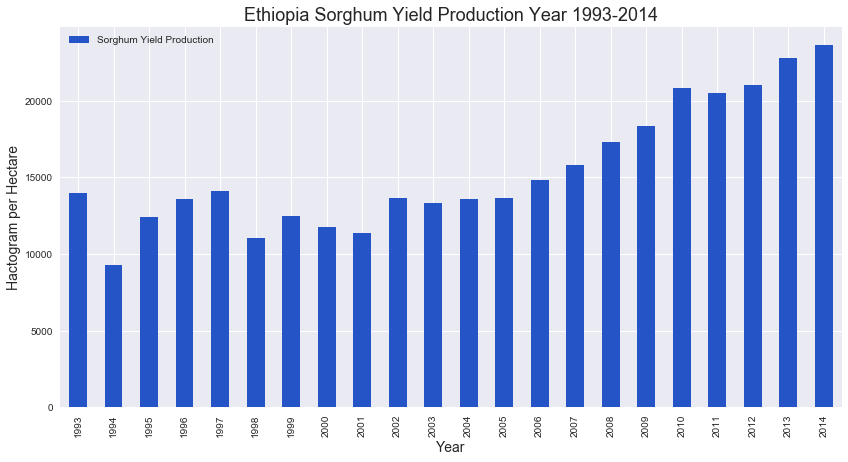

In [94]:
plt.figure(figsize = (14, 7))
final_df.crop_yield.plot(kind = 'bar', color = '#2554C7', label = 'Sorghum Yield Production')
plt.legend(loc ='best')
plt.title('Ethiopia Sorghum Yield Production Year 1993-2014', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Hactogram per Hectare', fontsize = 14)
# plt.xticks(np.arange(1993, 2015, 1))
plt.show()

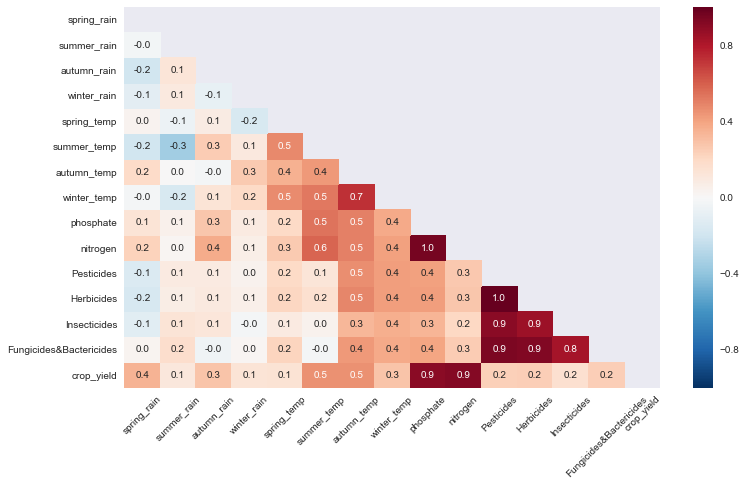

In [95]:
# Check the correlation of crop yield and the features

corrmat = final_df.corr()
fig, ax = plt.subplots(figsize = (12,7))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corrmat, mask = mask, annot = True, fmt = '.1f')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, rotation = 45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, rotation = 0)
plt.show()

#### Correlation map shows there is a strong and positive relationship between crop yields and fertilizers, phosphate & nitrogen.

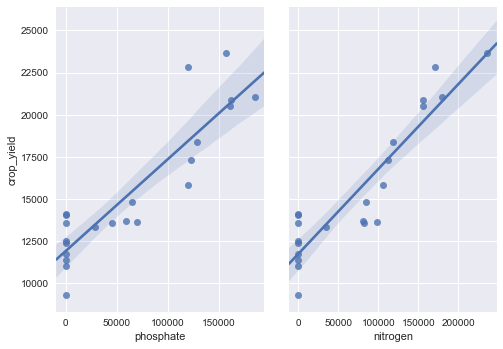

In [96]:
# Look at the pairplot between crop yield and fertilizers.
sns.pairplot(final_df, x_vars = ['phosphate', 'nitrogen'], 
            y_vars = 'crop_yield', size = 5, aspect = 0.7, kind = 'reg')

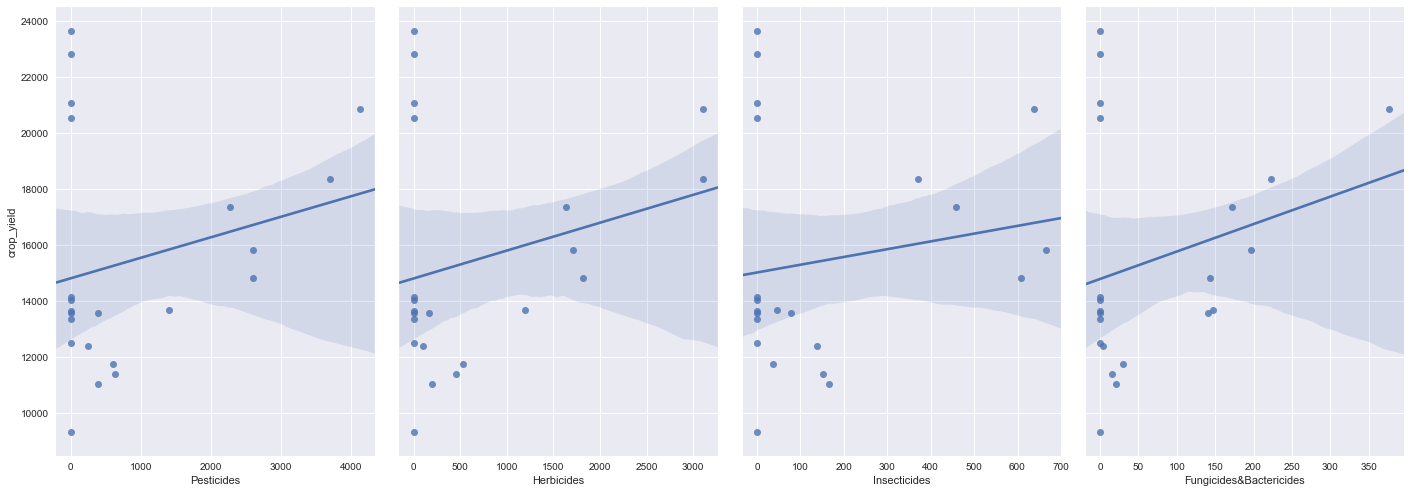

In [97]:
sns.pairplot(final_df, x_vars = ['Pesticides', 'Herbicides',
                             'Insecticides', 'Fungicides&Bactericides'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')

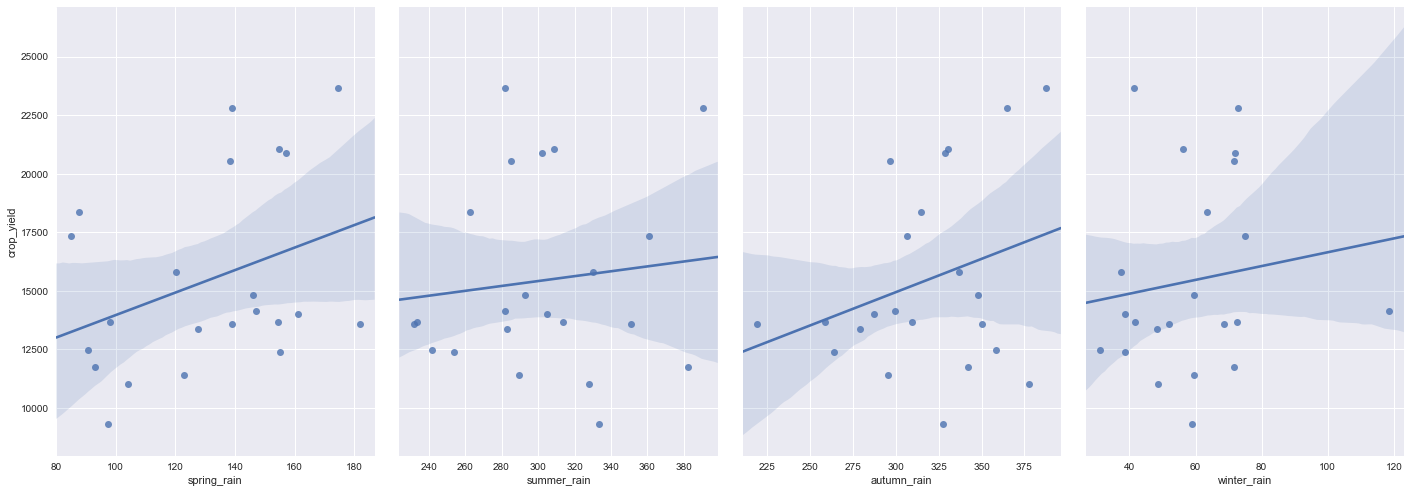

In [98]:
sns.pairplot(final_df, x_vars = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')

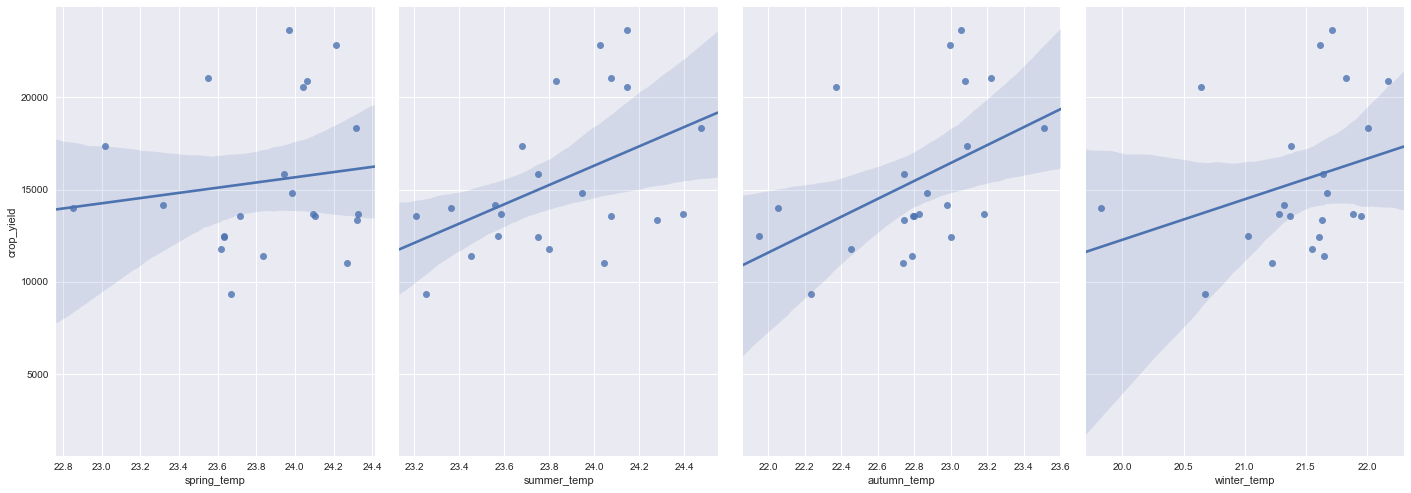

In [99]:
sns.pairplot(final_df, x_vars = ['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], 
            y_vars = 'crop_yield', size = 7, aspect = 0.7, kind = 'reg')

#### Look! The nitrogen, pesticide have a strong impact on the yield production. 
#### Other features such as rain, temperature, and pesticides also have positive impact on yield production, but fertilizers seem to contribute more on yield production. 


## 3. Modeling 

Compare four regression models
 - Multilinear Regression
 - RandomForest Regressor
 - GradianBoosting Regressor
 - Support Vector Regression
 
The choice of modeling are all regression because:
* 1) the predict value is a continious value
* 2) the dataset is small. It only has 21 years of crop yield data
* 3) the dataset has heterogeneous features


In [100]:
# Select features for training & prediction

crop_prod_feat = ['spring_rain', 'summer_rain', 'autumn_rain', 'winter_rain',
             'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp',
            'nitrogen', 'phosphate', 'Pesticides', 'Herbicides', 'Insecticides',
            'Fungicides&Bactericides']


X = final_df[crop_prod_feat]
y = final_df.crop_yield.values

print X.shape
print y.shape


(22, 14)
(22,)


In [101]:
# Scale the data for better performance
scaler = StandardScaler()
Xs= scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns)

In [102]:
# Perform train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.25)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape


(16, 14) (16,)
(6, 14) (6,)


<a id="Multilinear-Regression"></a>
### Model 1 - Multilinear Regression

In [103]:
# Import LinearRegression from sklearn and instantia model
# fit the train dataset
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression().fit(X_train, y_train)

In [104]:
# print linreg intercept and coefficient

print linreg.intercept_
print linreg.coef_


15019.8709149
[ -2.15603203e+03  -9.42595915e+02   2.09321211e+02   1.85241712e+03
   6.65149092e+02  -1.29080057e+02  -5.85980954e+02   2.09979152e+03
   5.04110416e+03  -1.09777984e+02   2.11931995e+05  -1.70865962e+05
  -3.84983291e+04  -9.94078795e+03]


In [105]:
zip(crop_prod_feat, linreg.coef_)

[('spring_rain', -2156.0320317878563),
 ('summer_rain', -942.59591486005138),
 ('autumn_rain', 209.32121096093658),
 ('winter_rain', 1852.4171188338394),
 ('spring_temp', 665.14909168275699),
 ('summer_temp', -129.08005719269522),
 ('autumn_temp', -585.98095373261094),
 ('winter_temp', 2099.7915160129382),
 ('nitrogen', 5041.1041556302225),
 ('phosphate', -109.77798367135119),
 ('Pesticides', 211931.99484884058),
 ('Herbicides', -170865.96218595019),
 ('Insecticides', -38498.329063477395),
 ('Fungicides&Bactericides', -9940.7879525792559)]

In [106]:
y_pred_linreg = linreg.predict(X_test)


In [107]:
compare_linreg_result = pd.DataFrame(data = {'Actual': y_test, 'Linreg Prediction': y_pred_linreg})
compare_linreg_result

,Actual,Linreg Prediction
0,14018.0,-389.853111
1,14806.0,13768.257758
2,18356.0,12581.876609
3,13653.0,24504.435633
4,13574.0,20352.064122
5,12401.0,6791.379116


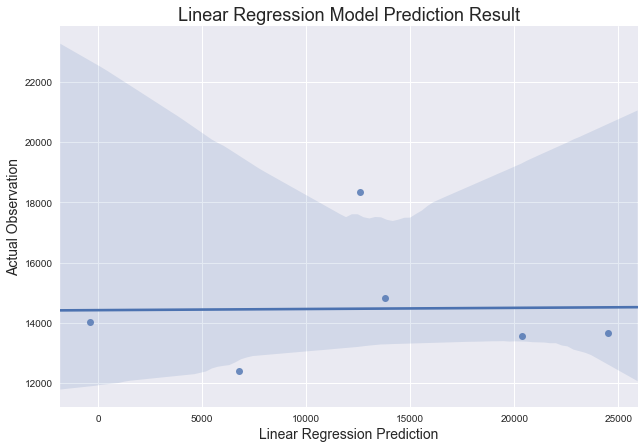

In [108]:
# Plot the linear regression predictions and the actual observations together. 

sns.lmplot(x = 'Linreg Prediction', y = 'Actual', data = compare_linreg_result, size = 6, aspect=1.5)
plt.title('Linear Regression Model Prediction Result', fontsize = 18)
plt.xlabel('Linear Regression Prediction', fontsize = 14)
plt.ylabel('Actual Observation', fontsize = 14)

# The predictions do not seem to be very accurate. 

In [109]:
print 'Linear Regression RMSE is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg))


Linear Regression RMSE is:  8535.87816365


In [110]:
print 'Linear Regression Cross Validation Score is: ', cross_val_score(linreg, Xs, y, cv = 5, scoring = 'neg_mean_squared_error').mean()


Linear Regression Cross Validation Score is:  -35063523.1749


#### Linear Regression model does not seem to be a good model to make a prediction in this case.

### Model 2: Support Vector Regression


In [111]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C= 1e3).fit(X_train, y_train)
y_pred_svr_lin = svr_lin.predict(X_test)

In [112]:
compare_SVR_result = pd.DataFrame(data = {'Actual': y_test, 'SVR Prediction': y_pred_svr_lin})
compare_SVR_result

,Actual,SVR Prediction
0,14018.0,13575.921467
1,14806.0,16103.060944
2,18356.0,15046.324627
3,13653.0,15684.439062
4,13574.0,16720.173035
5,12401.0,12332.919698


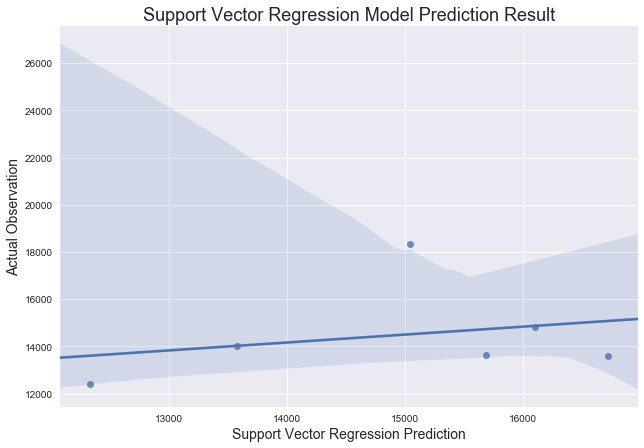

In [113]:
# Plot the support vector regression predictions and the actual observations together. 

sns.lmplot(x = 'SVR Prediction', y = 'Actual', data = compare_SVR_result, size = 6, aspect=1.5)
plt.title('Support Vector Regression Model Prediction Result', fontsize = 18)
plt.xlabel('Support Vector Regression Prediction', fontsize = 14)
plt.ylabel('Actual Observation', fontsize = 14)

# Some imporvement.

In [114]:
print 'SVR RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_lin))

SVR RMSE Score is:  2115.87397048


In [115]:
print 'SVR Cross Validation Score is: ', cross_val_score(svr_lin, Xs, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

SVR Cross Validation Score is:  -23789563.1224


#### Support Vector Regression is a little better

### Model 3 - RandomForest Regressor

In [116]:
# Instantiate the RandomForest Regression Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=3000)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=3000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [117]:
y_pred_rf = rf.predict(X_test)

In [118]:
compare_rf_result = pd.DataFrame(data = {'Actual': y_test, 'RF Prediction': y_pred_rf})
compare_rf_result



,Actual,RF Prediction
0,14018.0,12121.914000
1,14806.0,14581.909667
2,18356.0,18587.524333
3,13653.0,14237.255667
4,13574.0,13905.256000
5,12401.0,13657.986000


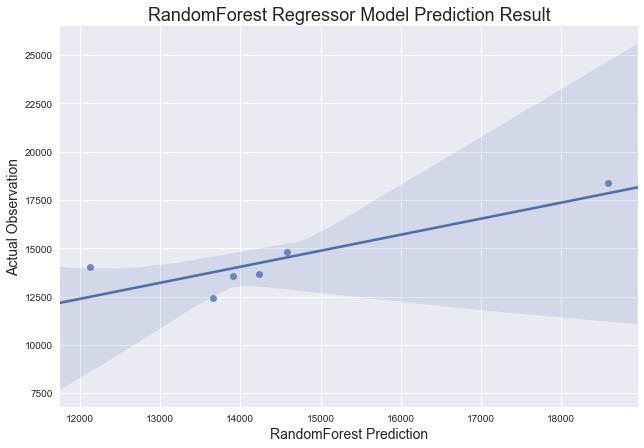

In [119]:
# Plot the random forest predictions and the actual observations together. 

sns.lmplot(x = 'RF Prediction', y = 'Actual', data = compare_rf_result, size = 6, aspect=1.5)
plt.title('RandomForest Regressor Model Prediction Result', fontsize = 18)
plt.xlabel('RandomForest Prediction', fontsize = 14)
plt.ylabel('Actual Observation', fontsize = 14)

# Much improvement

In [120]:
print 'RandomForest RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))

RandomForest RMSE Score is:  977.246227892


In [121]:
print 'RaindomForest Cross Validation Score is: ', cross_val_score(rf, Xs, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

RaindomForest Cross Validation Score is:  -9814016.23553


In [122]:
best_rf_prod_feat = zip(crop_prod_feat, rf.feature_importances_)
best_rf_prod_feat = pd.DataFrame(best_rf_prod_feat)
best_rf_prod_feat.sort_values(by = 1, ascending=False)

,0,1
8,nitrogen,0.425743
9,phosphate,0.355923
5,summer_temp,0.039112
6,autumn_temp,0.035263
0,spring_rain,0.032335
7,winter_temp,0.029228
3,winter_rain,0.016518
2,autumn_rain,0.013272
13,Fungicides&Bactericides,0.011671
4,spring_temp,0.009076


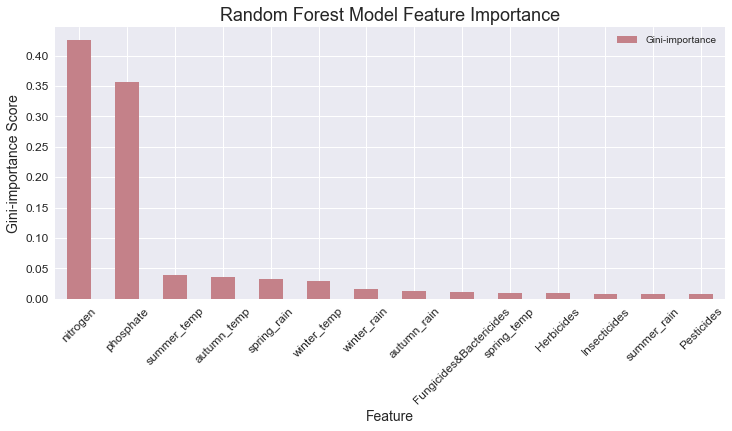

In [123]:
rf_feats= {}
for feature, importance in zip(crop_prod_feat, rf.feature_importances_):
    rf_feats[feature] = importance
    
rf_feat_importances = pd.DataFrame.from_dict(rf_feats, orient='index').rename(columns={0:'Gini-importance'})
rf_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', rot=45, figsize = (12,5), fontsize = 12, color = '#C48189')
plt.title('Random Forest Model Feature Importance', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)

#### There is  a lot of  improvement on the RandomForest Regessor accuracy. The model suggests the fertilizers, especially nitrogen plays a very important role on sorghum yield improvement in Ethiopia. 
#### Since the invasive weed Striga can cause 50% of crop loss annually, I would have expected herbicides also plays an important role in crop yield production. 

### Model 4: Gradient Boosting Regressor with Grid Search CV

In [124]:
# Tune hyperparameters via grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
             'max_depth': [4, 6], 
             'min_samples_leaf': [3, 5, 9, 17],
             'max_features': [1.0, 0.3, 0.1]}

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(n_estimators=3000)
gs_cv = GridSearchCV(gboost, param_grid).fit(X_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 1.0,
 'min_samples_leaf': 3}

In [137]:
best_gboost = GradientBoostingRegressor(n_estimators=3000, 
                                        learning_rate=0.1, 
                                        max_depth=6,
                                        max_features = 1.0,
                                        min_samples_leaf = 3).fit(X_train, y_train)



In [138]:
y_pred_gboost = best_gboost.predict(X_test)


In [139]:
compare_gboost_result = pd.DataFrame(data = {'Actual': y_test, 'gboost Prediction': y_pred_gboost})
compare_gboost_result

,Actual,gboost Prediction
0,14018.0,11604.899620
1,14806.0,14241.058671
2,18356.0,17828.168706
3,13653.0,13925.477142
4,13574.0,14250.144656
5,12401.0,14021.366586


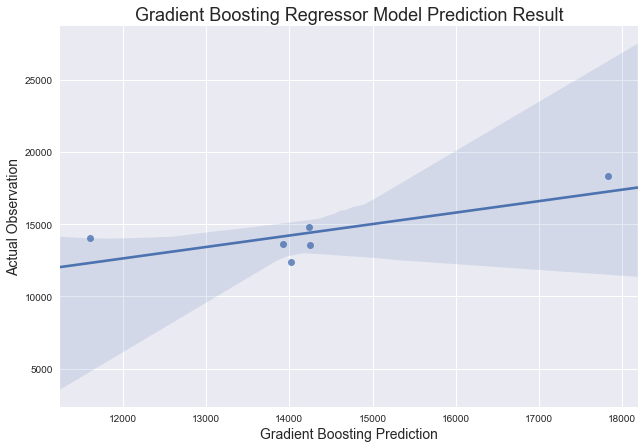

In [140]:
sns.lmplot(x = 'gboost Prediction', y = 'Actual', data = compare_gboost_result, size = 6, aspect=1.5)
plt.title('Gradient Boosting Regressor Model Prediction Result', fontsize = 18)
plt.xlabel('Gradient Boosting Prediction', fontsize = 14)
plt.ylabel('Actual Observation', fontsize = 14)

In [141]:
print 'Gradient Boosting RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gboost))

Gradient Boosting RMSE Score is:  1263.44906824


In [142]:
print "Gradient Boosting Cross Validation Score is: ", cross_val_score(best_gboost, Xs, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

Gradient Boosting Cross Validation Score is:  -6369447.98254


In [143]:
best_gboost_prod_feat = zip(crop_prod_feat, best_gboost.feature_importances_)
best_gboost_prod_feat = pd.DataFrame(best_gboost_prod_feat)
best_gboost_prod_feat.sort_values(by = 1, ascending=False)

,0,1
5,summer_temp,0.047904
6,autumn_temp,0.028735
2,autumn_rain,0.025823
1,summer_rain,0.021781
7,winter_temp,0.018709
0,spring_rain,0.018614
8,nitrogen,0.009729
3,winter_rain,0.009118
4,spring_temp,0.006145
9,phosphate,0.004634


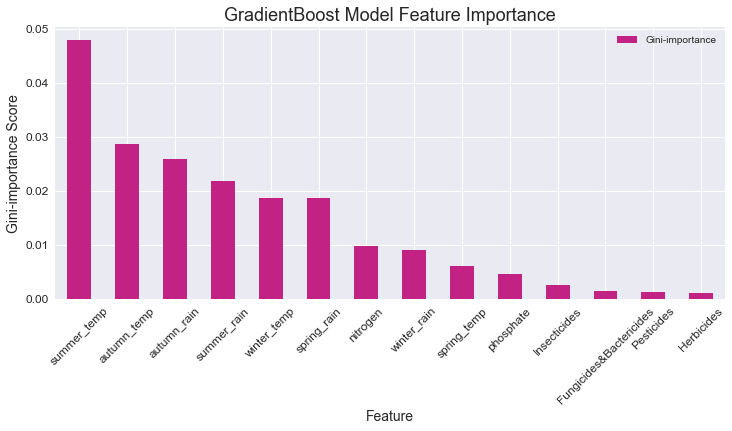

In [144]:
gboost_feats= {}
for feature, importance in zip(crop_prod_feat, best_gboost.feature_importances_):
    gboost_feats[feature] = importance
    
gboost_feat_importances = pd.DataFrame.from_dict(gboost_feats, orient='index').rename(columns={0:'Gini-importance'})
gboost_feat_importances.sort_values(by='Gini-importance', ascending=False).plot(kind = 'bar', rot=45, figsize = (12,5), fontsize = 12, color = '#C12283')
plt.title('GradientBoost Model Feature Importance', fontsize = 18)
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Gini-importance Score', fontsize = 14)

#### Gradient Boosting does not perfrom as well as Random Forest. The model suggests temperature and rainfall are the most important features, followed by nitrogen fertilizer. This does make sense because temperatures and rainfalls are essential to plant growth. 
#### Further research also show nitrogen rich soild can reduce the invasive weed Striga growth rate. This may be the reason herbicides has not been a major feature compared to nitrogen. 

## 4. Score Comparision

In [145]:
# Compare all the 4 models Root Mean Squre Errors (RMSE)

print 'Linear Regression RMSE is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg))
print 'Support Vector Regression RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_lin))
print 'Random Forest Regression RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
print 'Gradient Boosting Regression RMSE Score is: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gboost))

Linear Regression RMSE is:  8535.87816365
Support Vector Regression RMSE Score is:  2115.87397048
Random Forest Regression RMSE Score is:  977.246227892
Gradient Boosting Regression RMSE Score is:  1263.44906824


In [146]:
# Calculate all the 4 models cross validation scores

linreg_MSE = cross_val_score(linreg, Xs, y, cv = 5, scoring='neg_mean_squared_error').mean()
SVR_MSE = cross_val_score(svr_lin, Xs, y, cv = 5, scoring='neg_mean_squared_error').mean()
RF_MSE = cross_val_score(rf, Xs, y, cv = 5, scoring='neg_mean_squared_error').mean()
gboost_MSE = cross_val_score(best_gboost, Xs, y, cv = 5, scoring='neg_mean_squared_error').mean()

In [147]:
# Get the square root of the mean squared errors and compare the 4 model RMSE from the cross validation
print 'Multilinear Regression Cross Validation Score is: ', np.sqrt(-linreg_MSE)
print 'Support Vector Regression Cross Validation Score is: ', np.sqrt(-SVR_MSE)
print 'Raindom Forest Regressor Cross Validation Score is: ', np.sqrt(-RF_MSE)
print 'Gradient Boosting Cross Validation Score is: ', np.sqrt(-gboost_MSE)

Multilinear Regression Cross Validation Score is:  5921.44603749
Support Vector Regression Cross Validation Score is:  4877.4545741
Raindom Forest Regressor Cross Validation Score is:  3140.04527707
Gradient Boosting Cross Validation Score is:  2694.37506009


## 5. Conclusion 

Using the same data and train test split 75/25, both Random Forest and Gradient Boosting Ensemble models come out far better than the Multi-linear & Support Vector Regression models.

Even though Gradient Boosting suggest temperature are the most important features for sorghum production, since there is little we can do about temperatures, we need to focus on maximizing the next two important features rainfall and nitrogen fertilizer. 

Ethiopia's winter is extremely dry. The winter droughts have serve impact on seeding and growing seasons. Research shows Ethiopia has implemented water conservation program during the raining season to supplement the drought seasons. 

In addition to temperature and rainfall, both Random Forest and Gradient Boosting model suggest nitrogen is essential to the improved sorghum yields production in Ethiopia. FOA has been partnered with the Ethiopia government to erect 5 fertilizer blending plants so far.  

Similar water conservation and fertilizer plant investments should be implemented to Ethiopia neighboring countries to gradually eradicate famine. 


#### Data from Food and Agriculture Organiztion of the United Nations

http://www.fao.org/faostat/en/#home